# IMPORTS

## Libraries

In [1]:
import warnings

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display      import Image
from IPython.core.display import HTML


warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
dfRaw = pd.read_feather('00-Data/FeatherData/df01.feather')

In [3]:
dfRaw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,True,True,101348.88,True
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,True,False,113931.57,True
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,False,False,93826.63,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False


## Helper Functions

In [7]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set() 

Populating the interactive namespace from numpy and matplotlib


In [8]:
jupyter_settings()  

Populating the interactive namespace from numpy and matplotlib


## Final Hypothesis List
---
> - H01 - Men usually have more churn
> - H02 - Women usually buy more products
> - H03 - Younger clients are less loyal and more likely to leave a bank
> - H04 - Clients with higher estimated wages have higher Churn Rate
> - H05 - Countries of Latin origin have higher number of churn
> - H06 - Active members have less churn
> - H07 - Along the years Churn tends to be lower
> - H08 - Customers with Credit Cards tend to stay at the bank
> - H09 - Customers with higher balance remain at the bank

# EXPLORATORY DATA ANALYSIS

In [4]:
df03 = dfRaw.copy()

## Univariate Analysis

### H01 - Men usually have more churn
---
> - Conclusion: **FALSE** 
>> **WOMEN** have more churn

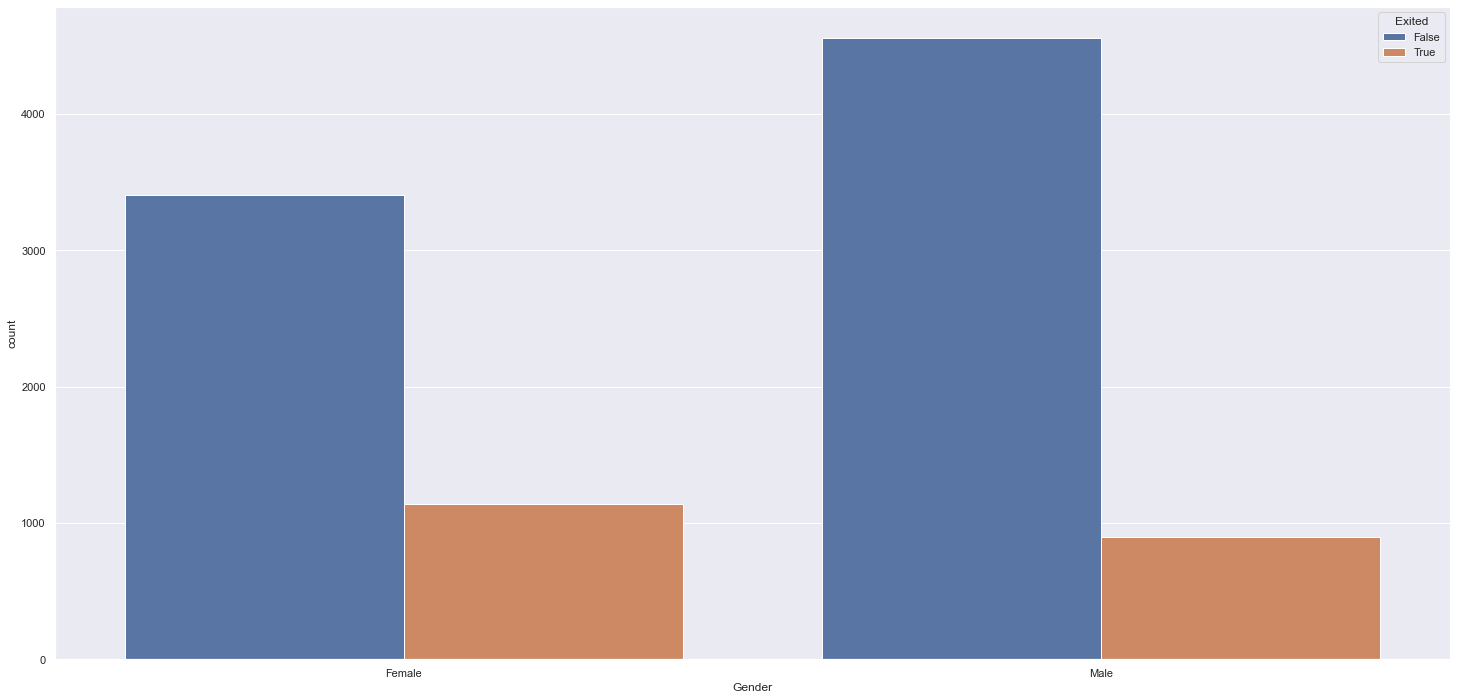

In [9]:
sns.countplot(x='Gender', hue='Exited', data=df03)
plt.show()

### H02 - Women usually buy more products
---
> - Conclusion: **FALSE** 
>> **MEN** usually buy more products

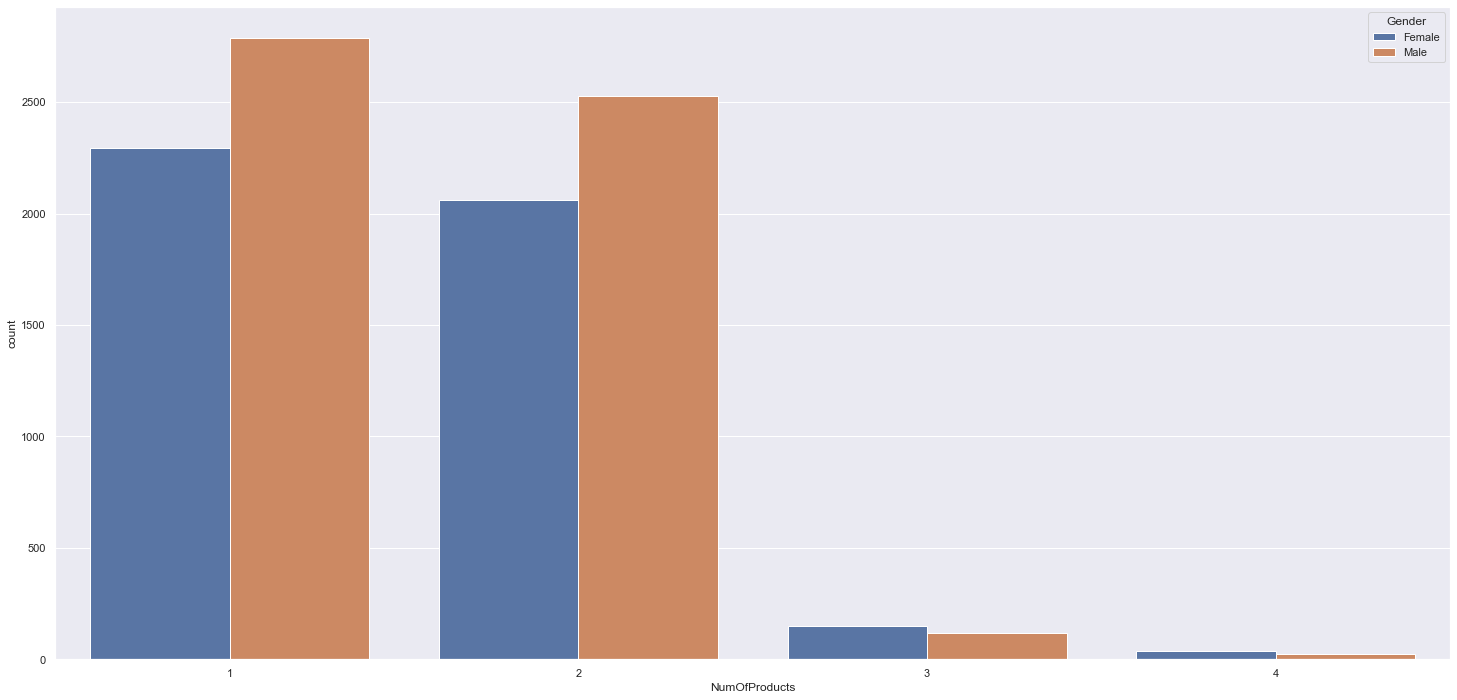

In [10]:
sns.countplot(x='NumOfProducts', hue='Gender', data=df03)
plt.show()

### H03 - Younger clients are less loyal and more likely to leave a bank
---
> - Conclusion: **FALSE** 
>> Younger clients are **MORE** loyal and more likely to leave a bank

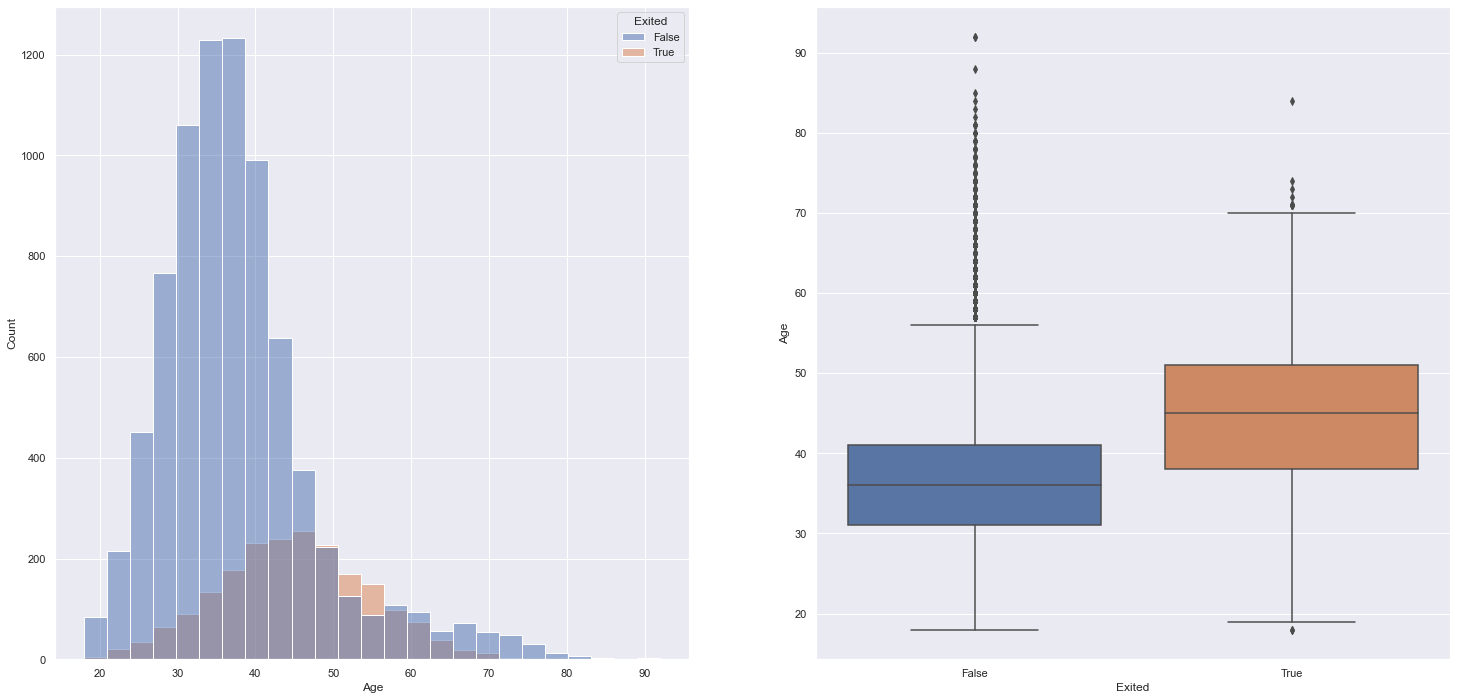

In [14]:
plt.subplot(1,2,1)
sns.histplot(x='Age', bins=25, hue='Exited', data=df03)

plt.subplot(1,2,2)
sns.boxplot(x='Exited', y='Age', data=df03)
plt.show()

### H04 - Clients with higher estimated wages have higher Churn Rate
---
> - Conclusion: **FALSE** 
>> 

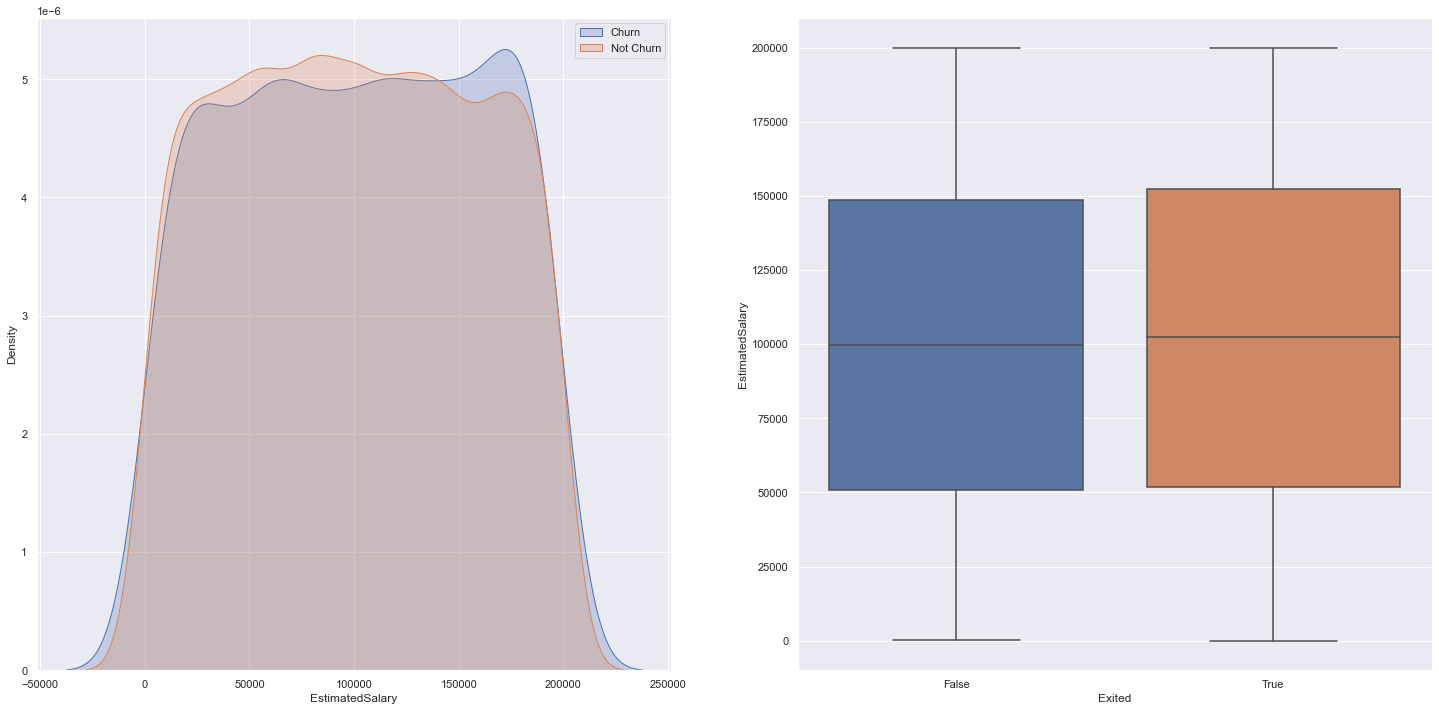

In [19]:
plt.subplot(1,2,1)
sns.kdeplot(df03[df03['Exited'] == True]['EstimatedSalary'], label='Churn', shade=True)
sns.kdeplot(df03[df03['Exited'] == False]['EstimatedSalary'], label='Not Churn', shade=True)
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df03)
plt.show()